- t-SNE is a powerful non-linear dimensionality reduction technique primarily used for visualizing high-dimensional datasets in low-dimensional space (typically 2D or 3D).

#### B. t-Distributed Stochastic Neighbor Embedding (t-SNE) Examples

#### Example 1 (t-SNE): Visualizing the Digits Dataset

- The Digits dataset consists of 8x8 pixel images of handwritten digits (0-9). t-SNE can help us visualize how these high-dimensional images (64 features) cluster in a 2D space.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler # Good practice, though t-SNE is less sensitive than PCA/LDA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Digits Dataset ---
digits = load_digits()
X, y = digits.data, digits.target # X is (n_samples, 64 features), y is the digit label (0-9)
n_samples, n_features = X.shape
target_names = digits.target_names # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

print("Digits Dataset Loaded for t-SNE Visualization.")
print(f"Original features shape: ({n_samples}, {n_features})")
print(f"Number of classes: {len(np.unique(y))}")


Digits Dataset Loaded for t-SNE Visualization.
Original features shape: (1797, 64)
Number of classes: 10


In [3]:
# --- 2. Standardize the Features (Optional but often good practice) ---
# t-SNE works on pairwise similarities, scaling can sometimes help,
# especially if features have vastly different ranges, though it's less critical than for PCA/LDA.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData Scaled.")



Data Scaled.


In [5]:
# --- 3. Apply t-SNE ---
# Key t-SNE parameters:
#   n_components: Dimension of the embedded space (usually 2 or 3 for visualization).
#   perplexity: Related to the number of nearest neighbors. Typical values: 5-50.
#               It influences the balance between local and global aspects of the data.
#   n_iter: Number of iterations for optimization.
#   learning_rate: Usually between 10.0 and 1000.0. In recent scikit-learn versions, 'auto' is an option.
#   init: Method for initialization ('random', 'pca'). 'pca' is often a good start.
#   random_state: For reproducibility.

print("\n--- Applying t-SNE (this might take a moment for digits dataset)... ---")
tsne_digits = TSNE(n_components=2,
                     perplexity=30, # A common default value
                     max_iter=1000,   # Number of iterations
                     learning_rate='auto', # New default in scikit-learn 1.2
                     init='pca',      # PCA initialization can be more stable
                     random_state=42,
                     n_jobs=-1)       # Use all processors

X_tsne_digits = tsne_digits.fit_transform(X_scaled) # Use scaled data

print(f"Shape of t-SNE transformed data: {X_tsne_digits.shape}")

# Create a DataFrame for the t-SNE results for easier plotting
tsne_digits_df = pd.DataFrame(data=X_tsne_digits, columns=['t-SNE Component 1', 't-SNE Component 2'])
tsne_digits_df['digit_label'] = y
# tsne_digits_df['digit_label_str'] = tsne_digits_df['digit_label'].astype(str) # For categorical legend


--- Applying t-SNE (this might take a moment for digits dataset)... ---
Shape of t-SNE transformed data: (1797, 2)


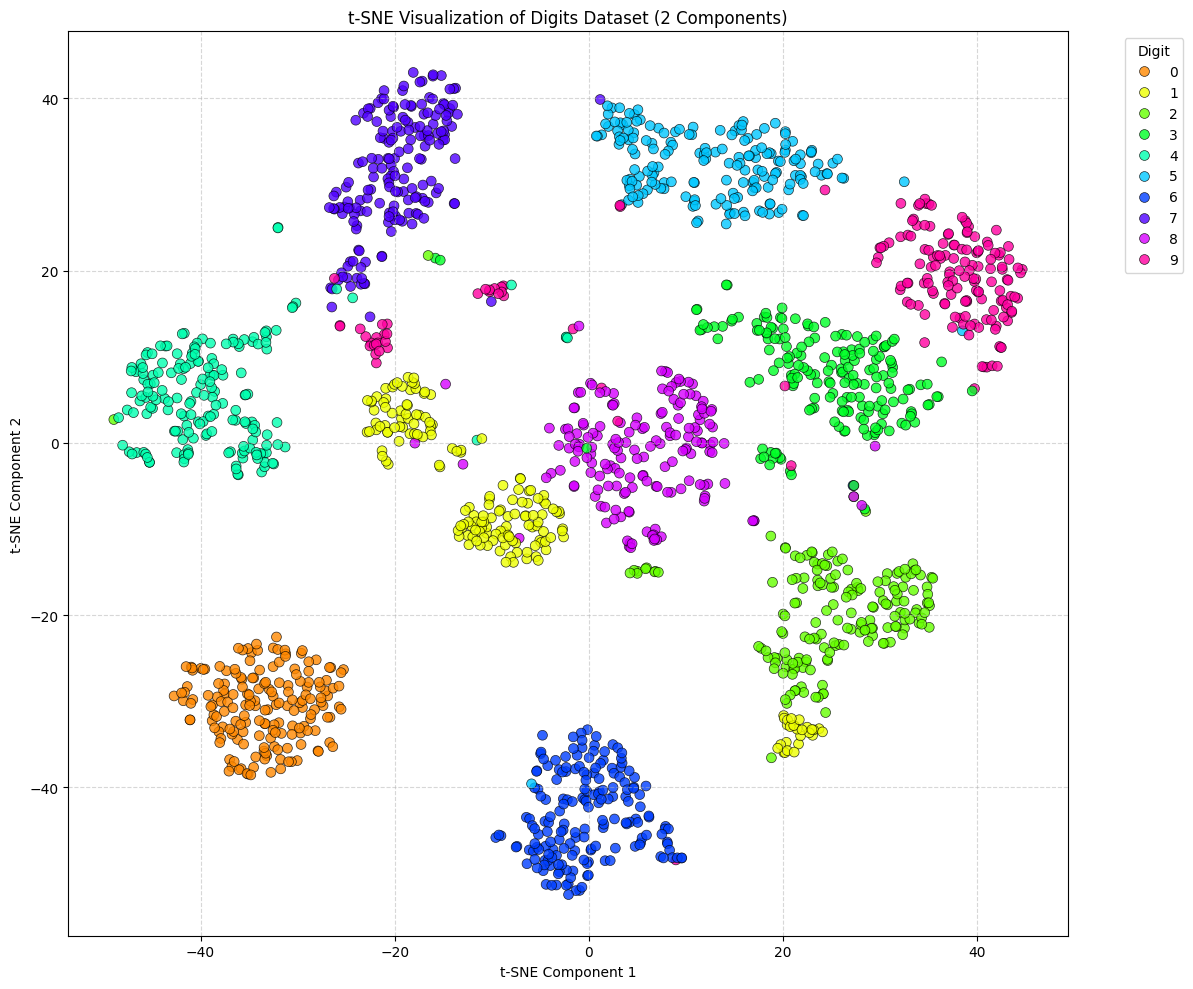

In [6]:
# --- 4. Visualize the 2D t-SNE-transformed Data ---
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x="t-SNE Component 1", y="t-SNE Component 2",
    hue="digit_label", # Color by the actual digit label
    palette=sns.color_palette("hsv", n_colors=len(np.unique(y))), # Use a palette with enough distinct colors
    data=tsne_digits_df,
    legend="full",
    alpha=0.8,
    s=50, # Marker size
    edgecolor='k',
    linewidth=0.5
)
plt.title('t-SNE Visualization of Digits Dataset (2 Components)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# --- Optional: Try different perplexity values ---
# Perplexity can significantly change the visualization.
# print("\n--- Trying t-SNE with different perplexity values ---")
# perplexities_to_try = [5, 30, 50, 100]
# fig, axes = plt.subplots(1, len(perplexities_to_try), figsize=(20, 5))
# if len(perplexities_to_try) == 1: axes = [axes] # Ensure axes is iterable

# for i, perp_val in enumerate(perplexities_to_try):
#     tsne_temp = TSNE(n_components=2, perplexity=perp_val, n_iter=500, learning_rate='auto', init='pca', random_state=42, n_jobs=-1)
#     X_tsne_temp = tsne_temp.fit_transform(X_scaled)
#     temp_df = pd.DataFrame(data=X_tsne_temp, columns=['C1', 'C2'])
#     temp_df['label'] = y
    
#     sns.scatterplot(x='C1', y='C2', hue='label', palette=sns.color_palette("hsv", 10), data=temp_df, legend=False, ax=axes[i], s=20, alpha=0.7)
#     axes[i].set_title(f'Perplexity = {perp_val}')
#     axes[i].set_xticks([])
#     axes[i].set_yticks([])
# plt.suptitle("t-SNE with Different Perplexity Values (Digits Dataset)")
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.show()



**Discussion for t-SNE Digits Example:**

- Visualization Goal: The primary output is the 2D scatter plot. You should observe that t-SNE does a good job of grouping images of the same digit together, forming distinct clusters in the 2D space, even though it's an unsupervised method (it doesn't use the digit labels during the fit_transform process; labels are only used for coloring the plot).
- perplexity: This is a key parameter. It balances attention to local and global aspects of your data. Experimenting with different perplexity values can sometimes reveal different structures. A perplexity value that is too low might break up natural clusters, while one that is too high might merge them.
- init='pca': Initializing t-SNE with the first few principal components can often lead to more stable and globally coherent embeddings, and can sometimes speed up convergence.
- Computational Cost: t-SNE can be slow for datasets with many samples. n_jobs=-1 helps by using all available CPU cores.

---
#### Example 2 (t-SNE): Visualizing make_blobs Data - Comparing with PCA

- This example uses the make_blobs dataset to generate data with known clusters and then visualizes it using both t-SNE and PCA to highlight their different characteristics for visualization.

In [7]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# --- 1. Generate Synthetic Data with Clear Clusters ---
n_samples = 300
n_features = 10 # Higher dimensional to make reduction more interesting
n_clusters_true = 4
random_state = 42

X_blobs, y_blobs_true = make_blobs(n_samples=n_samples,
                                   n_features=n_features,
                                   centers=n_clusters_true,
                                   cluster_std=1.5, # Slightly more spread
                                   random_state=random_state)

print("Synthetic 'make_blobs' Dataset Generated for t-SNE vs. PCA.")
print(f"Original features shape: {X_blobs.shape}")


Synthetic 'make_blobs' Dataset Generated for t-SNE vs. PCA.
Original features shape: (300, 10)


In [9]:
# --- 2. Feature Scaling ---
scaler_blobs = StandardScaler()
X_blobs_scaled = scaler_blobs.fit_transform(X_blobs)
print("\nData Scaled.")



Data Scaled.


In [10]:
# --- 3. Apply PCA (reducing to 2 components) ---
print("\n--- Applying PCA ---")
pca_blobs = PCA(n_components=2, random_state=random_state)
X_pca_blobs = pca_blobs.fit_transform(X_blobs_scaled)
print(f"PCA explained variance ratio: {pca_blobs.explained_variance_ratio_}, Sum: {np.sum(pca_blobs.explained_variance_ratio_):.4f}")



--- Applying PCA ---
PCA explained variance ratio: [0.5909091  0.20500612], Sum: 0.7959


In [12]:
# --- 4. Apply t-SNE (reducing to 2 components) ---
print("\n--- Applying t-SNE (this might take a moment)... ---")
tsne_blobs = TSNE(n_components=2,
                    perplexity=25, # Adjust based on dataset size/density
                    max_iter=500,    # Fewer iterations for quicker example
                    learning_rate='auto',
                    init='pca',
                    random_state=random_state,
                    n_jobs=-1)
X_tsne_blobs = tsne_blobs.fit_transform(X_blobs_scaled)



--- Applying t-SNE (this might take a moment)... ---


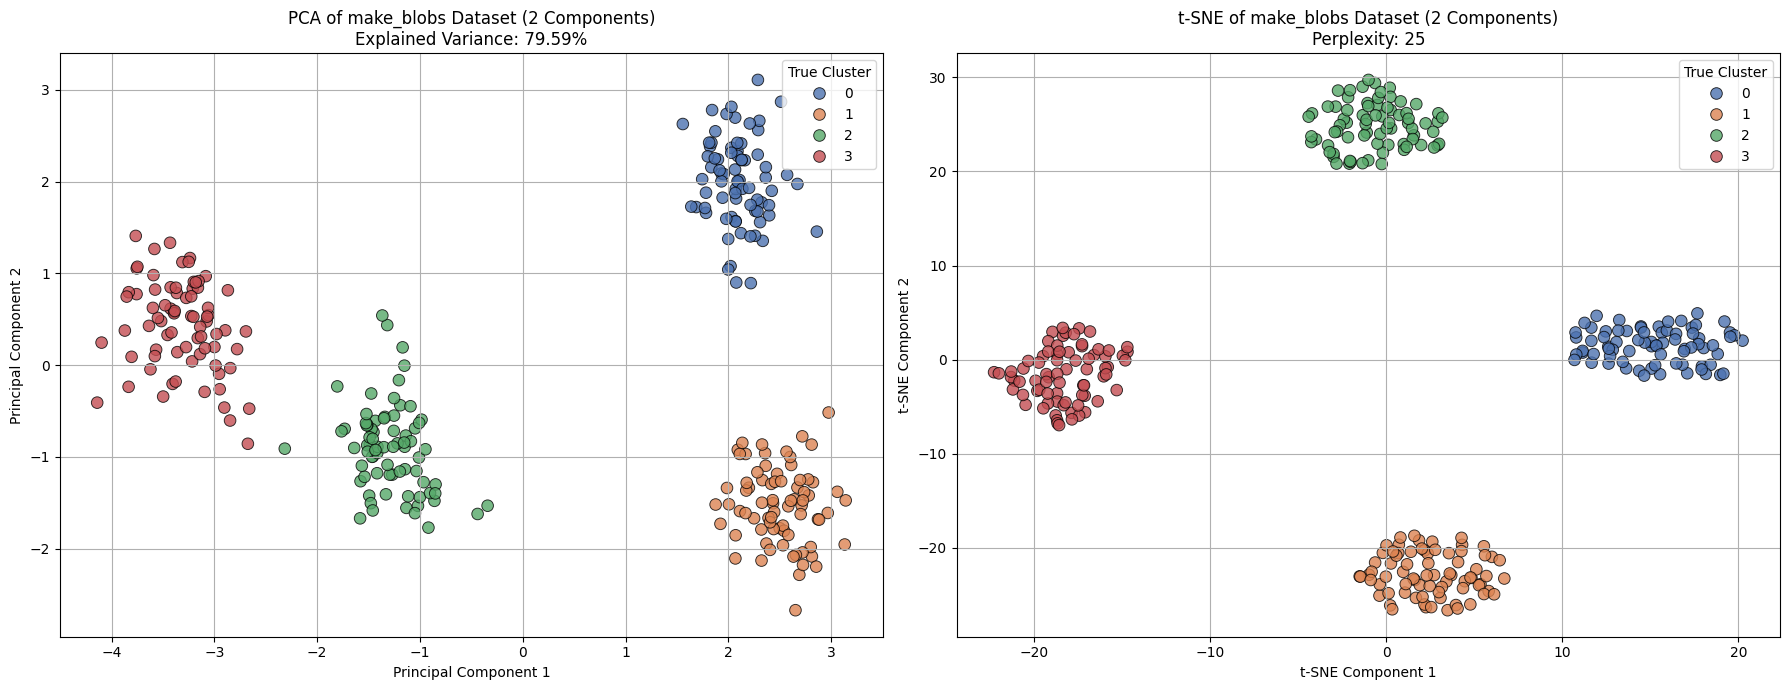

In [13]:
# --- 5. Visualize the Results ---
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
palette_blobs = sns.color_palette("deep", n_colors=n_clusters_true)

# PCA Plot
pca_df_vis_blobs = pd.DataFrame(data=X_pca_blobs, columns=['PC1', 'PC2'])
pca_df_vis_blobs['true_label'] = y_blobs_true
sns.scatterplot(x='PC1', y='PC2', hue='true_label',
                palette=palette_blobs, data=pca_df_vis_blobs,
                s=70, alpha=0.8, edgecolor='k', ax=axes[0])
axes[0].set_title(f'PCA of make_blobs Dataset (2 Components)\nExplained Variance: {np.sum(pca_blobs.explained_variance_ratio_)*100:.2f}%')
axes[0].set_xlabel('Principal Component 1')
axes[0].set_ylabel('Principal Component 2')
axes[0].legend(title='True Cluster')
axes[0].grid(True)

# t-SNE Plot
tsne_df_vis_blobs = pd.DataFrame(data=X_tsne_blobs, columns=['t-SNE1', 't-SNE2'])
tsne_df_vis_blobs['true_label'] = y_blobs_true
sns.scatterplot(x='t-SNE1', y='t-SNE2', hue='true_label',
                palette=palette_blobs, data=tsne_df_vis_blobs,
                s=70, alpha=0.8, edgecolor='k', ax=axes[1])
axes[1].set_title(f't-SNE of make_blobs Dataset (2 Components)\nPerplexity: {tsne_blobs.perplexity}')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')
axes[1].legend(title='True Cluster')
axes[1].grid(True)

plt.tight_layout()
plt.show()


**Discussion for t-SNE vs. PCA on make_blobs Example:**

- PCA: PCA projects the data onto axes of maximum variance. The separation of clusters in the PCA plot will depend on whether the directions of maximum variance align well with the directions that separate the clusters.
- t-SNE: t-SNE aims to preserve local neighborhood structures. You will likely see that t-SNE produces more distinct and well-separated clusters in the 2D plot compared to PCA, especially if the original clusters were well-defined but perhaps not optimally separated along the principal axes of variance.
- Interpretation of Distances: Remember that with t-SNE, the relative sizes of the clusters and the distances between different clusters in the plot are not necessarily meaningful. The key is that points belonging to the same true cluster in high dimensions are grouped together in the low-dimensional t-SNE map.
- These two examples illustrate t-SNE's strength as a visualization tool for exploring the structure of high-dimensional data.

---
#### Example 3 (t-SNE): Visualizing the Wine Dataset - Effect of Perplexity

- The Wine dataset has 13 features and 3 classes (cultivars). We'll use t-SNE to visualize it in 2D and observe how different perplexity values affect the resulting embedding.

In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# --- 1. Load Wine Dataset ---
wine = load_wine()
X, y = wine.data, wine.target
feature_names = wine.feature_names
target_names = wine.target_names # ['class_0', 'class_1', 'class_2']

X_df = pd.DataFrame(X, columns=feature_names)
print("Wine Dataset Loaded for t-SNE Visualization.")
print(f"Original features shape: {X_df.shape}") # 13 features
print(f"Number of classes: {len(np.unique(y))}") # 3 classes


Wine Dataset Loaded for t-SNE Visualization.
Original features shape: (178, 13)
Number of classes: 3


In [16]:
# --- 2. Standardize the Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)
print("\nData Scaled.")



Data Scaled.



--- Applying t-SNE with different perplexity values (this might take some time)... ---
Running t-SNE with perplexity = 5...
Running t-SNE with perplexity = 15...
Running t-SNE with perplexity = 30...
Running t-SNE with perplexity = 50...


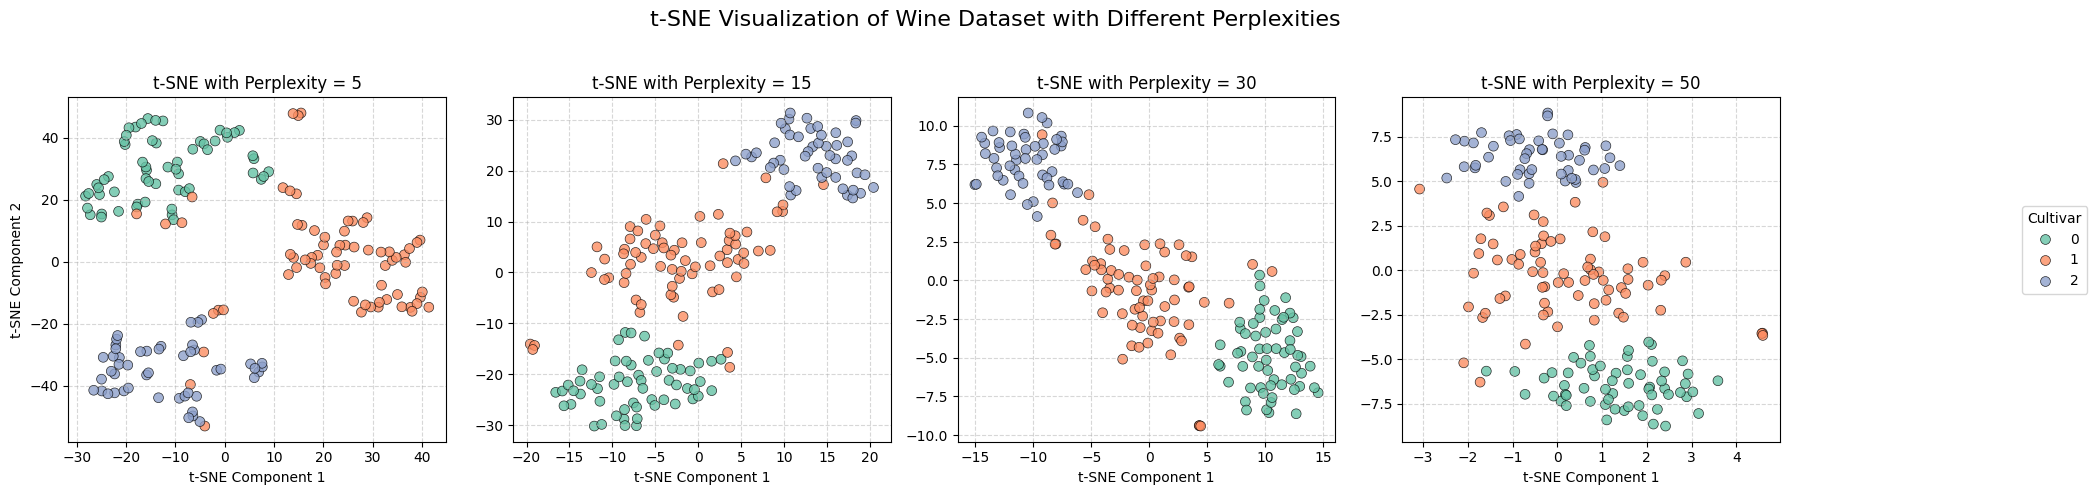

In [18]:
# --- 3. Apply t-SNE with Different Perplexity Values ---
# Perplexity is related to the number of nearest neighbors considered.
# Typical values are between 5 and 50.
perplexities_to_try = [5, 15, 30, 50]
n_iter_tsne = 1000 # Number of iterations

# Create a figure with subplots
fig, axes = plt.subplots(1, len(perplexities_to_try), figsize=(20, 5))
if len(perplexities_to_try) == 1: # Ensure axes is always iterable
    axes = [axes]

print("\n--- Applying t-SNE with different perplexity values (this might take some time)... ---")

for i, perp_val in enumerate(perplexities_to_try):
    print(f"Running t-SNE with perplexity = {perp_val}...")
    tsne_wine = TSNE(n_components=2,
                     perplexity=perp_val,
                     max_iter=n_iter_tsne,
                     learning_rate='auto',
                     init='pca', # PCA initialization is often good
                     random_state=42,
                     n_jobs=-1)
    X_tsne_wine = tsne_wine.fit_transform(X_scaled)

    tsne_wine_df = pd.DataFrame(data=X_tsne_wine, columns=['t-SNE1', 't-SNE2'])
    tsne_wine_df['cultivar_label'] = y
    
    sns.scatterplot(
        x="t-SNE1", y="t-SNE2",
        hue="cultivar_label",
        palette=sns.color_palette("Set2", n_colors=len(np.unique(y))),
        data=tsne_wine_df,
        legend="full" if i == len(perplexities_to_try) - 1 else False, # Show legend only for the last plot
        alpha=0.8,
        s=50,
        edgecolor='k',
        linewidth=0.5,
        ax=axes[i]
    )
    axes[i].set_title(f't-SNE with Perplexity = {perp_val}')
    axes[i].set_xlabel('t-SNE Component 1')
    axes[i].set_ylabel('t-SNE Component 2' if i == 0 else '') # Only show y-label for first plot
    axes[i].grid(True, linestyle='--', alpha=0.5)

fig.suptitle("t-SNE Visualization of Wine Dataset with Different Perplexities", fontsize=16)
# Adjust layout to make space for suptitle and legend
# fig.legend(title='Cultivar', handles=axes[-1].get_legend().legendHandles, labels=[t.get_text() for t in axes[-1].get_legend().texts], bbox_to_anchor=(1.01, 0.5), loc='center left')
# plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Adjust rect to make space for legend outside
# plt.show()

legend_from_last_subplot = axes[-1].get_legend()
if legend_from_last_subplot:
    fig.legend(title='Cultivar', 
               handles=legend_from_last_subplot.legend_handles, 
               labels=[text.get_text() for text in legend_from_last_subplot.texts], 
               bbox_to_anchor=(1.01, 0.5), 
               loc='center left')
    legend_from_last_subplot.remove() # Remove subplot legend as we have a figure legend
else:
    print("Warning: Could not create figure-level legend as no legend was found on the last subplot.")

plt.tight_layout(rect=[0, 0, 0.9, 0.95]) # Adjust rect to make space for legend outside
plt.show()


**Discussion for t-SNE Wine Example:**

- Effect of Perplexity: You will observe how the perplexity parameter influences the resulting 2D embedding.
- A very low perplexity (e.g., 5) might focus too much on very local relationships, potentially breaking up natural clusters or creating many small, isolated groups.
- A very high perplexity (e.g., 50 or more, depending on dataset size) might try to consider too many neighbors, potentially merging distinct clusters or creating a single large clump.
- Intermediate values (like 15 or 30 for this dataset size) often give a good balance and reveal meaningful cluster structures.
- Cluster Separation: t-SNE should be able to show a good separation of the three wine cultivars in the 2D plot for appropriate perplexity values.
- Non-Linearity: The shapes of the clusters and their arrangement will be non-linear, reflecting t-SNE's ability to capture complex manifold structures.
- These additional examples should provide more clarity on how LDA and t-SNE are used and how their key parameters can influence their output.